In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler
from category_encoders import TargetEncoder

from sklearn.metrics import mean_squared_error as mse, r2_score as r2

from IPython.display import Image

from datetime import datetime

In [2]:
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})

## Loading datasests

In [3]:
train_dataset_path = '/Users/macbook/Documents/DataScience/Projects/project_data_from_kaggle/train.csv'
test_dataset_path = '/Users/macbook/Documents/DataScience/Projects/project_data_from_kaggle/test.csv'
submission_path = '/Users/macbook/Documents/DataScience/Projects/project_data_from_kaggle/sample_submission.csv'

In [4]:
train_df = pd.read_csv(train_dataset_path, sep = ',')
test_df = pd.read_csv(test_dataset_path, sep = ',')

## EDA

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [6]:
train_df.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [7]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


#### We can see that the dataset has missing values (LifeSquare, Healthcare_1) and outliers (Rooms, Square, LifeSquare, KitchenSquare). Let's look at them more closely.

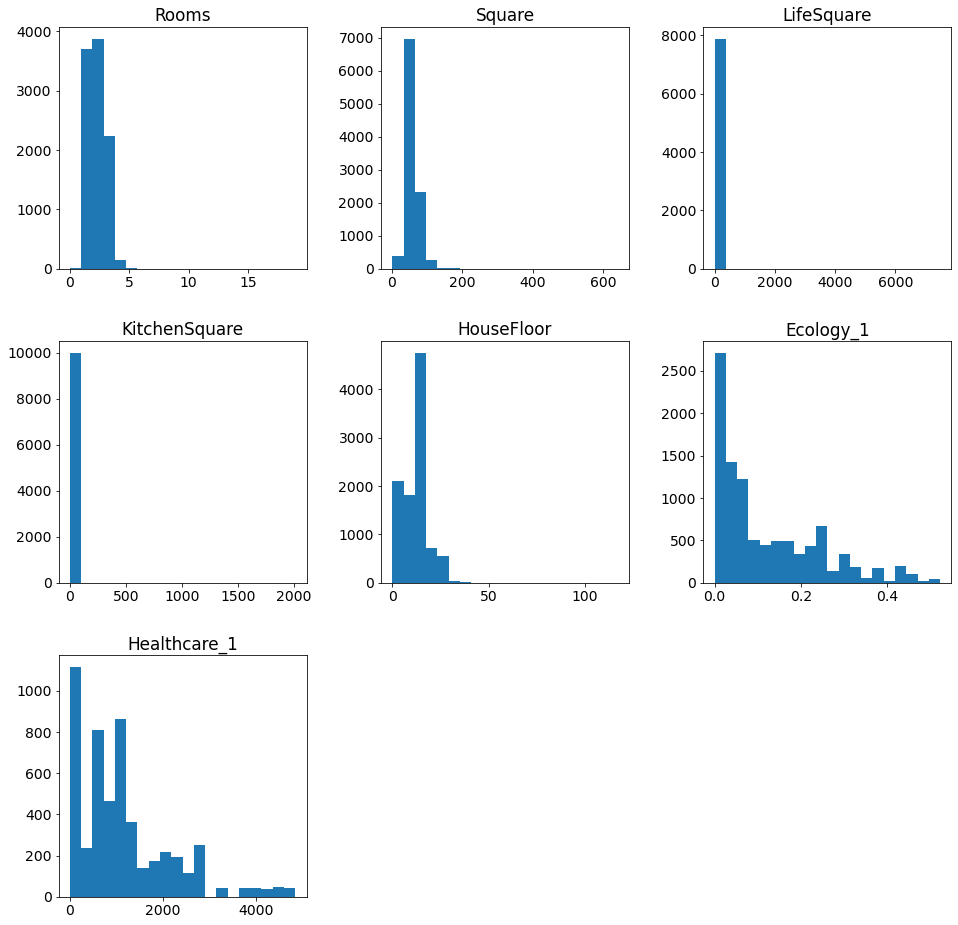

In [8]:
df_num_features = train_df.select_dtypes(include=['float64', 'float32', 'float16'])
df_num_features.drop('Price', axis=1, inplace=True)
df_num_features.hist(figsize=(16,16), bins=20, grid=False);

#### Let's also look at the target feature 

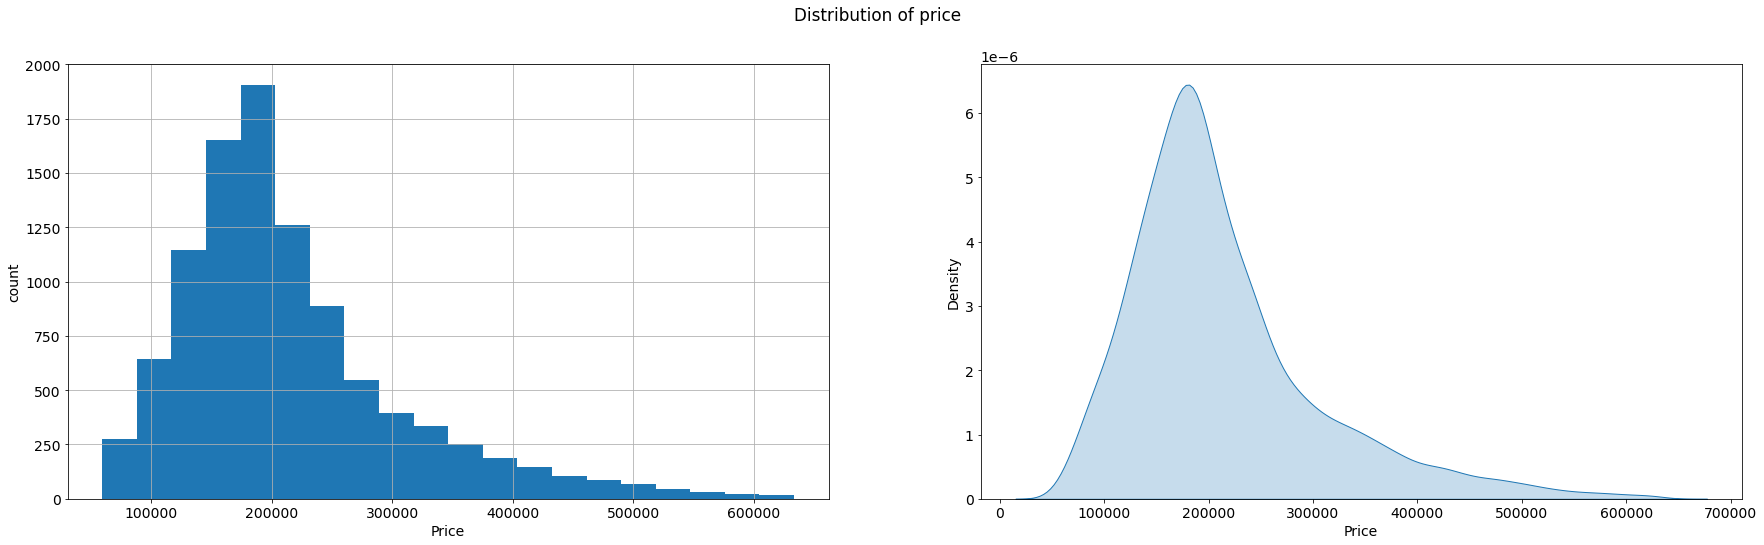

In [9]:
plt.figure(figsize = (30, 8))

plt.subplot(121)
train_df['Price'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(train_df['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Distribution of price')
plt.show()

#### Feature correlations 

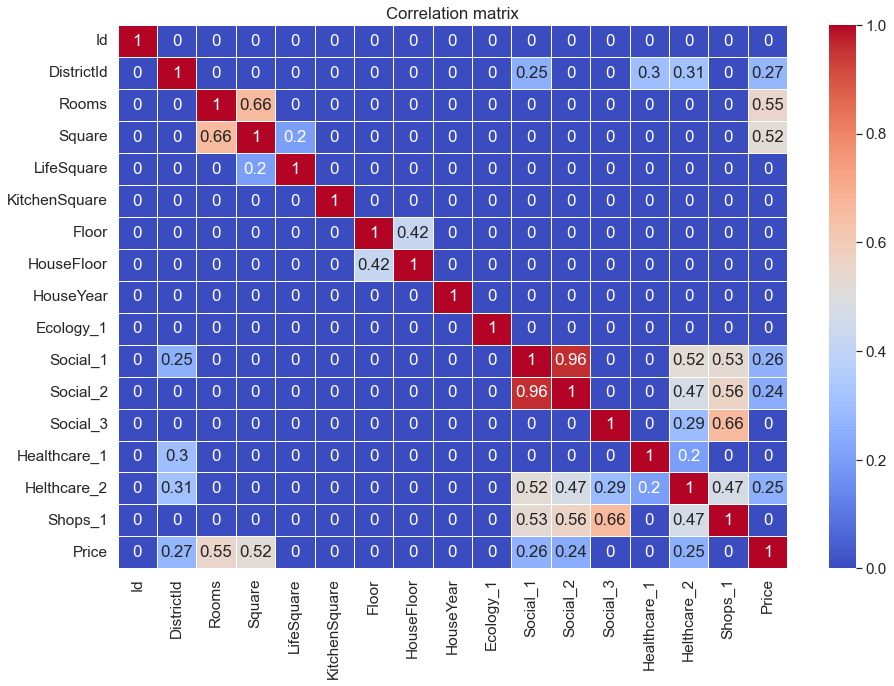

In [10]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = train_df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.2] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

## Data processing and feature generation

In [11]:
class DataPipeLine:
    
    def __init__(self):
        self.madians = None 
        self.healthcare_by_district = None
        
    def fit(self, df):
        self.medians = df.median()
        self.healthcare_by_district = df.groupby('DistrictId')['Healthcare_1'].mean()
        
    def transform(self, df): 
        
        # Fill nan 
        # LifeSquare
        condition = (df['LifeSquare'].isna()) & \
                    (~df['Square'].isna()) & \
                    (~df['KitchenSquare'].isna())
        
        df.loc[condition, 'LifeSquare'] = df.loc[condition, 'Square'] - df.loc[condition, 'KitchenSquare'] - 3
        
        # Healthcare_1
        df.loc[df['Healthcare_1'].isna(), 'Healthcare_1'] = df['DistrictId'].map(self.healthcare_by_district)
        df['Healthcare_1'].fillna(self.medians.Healthcare_1, inplace=True)
        
        # just in case 
        df.fillna(self.medians, inplace=True)
        
        # Outliers 
        # Rooms
        df.loc[(df['Rooms'] == 0) & (df['Square'] < 50), 'Rooms'] = 1
        df.loc[(df['Rooms'] == 0) & (df['Square'] > 50) & (df['Square'] < 100), 'Rooms'] = 3
        df.loc[(df['Rooms'] == 0) & (df['Square'] > 100), 'Rooms'] = 5
        df.loc[df['Rooms'] > 5, 'Rooms'] = self.medians.Rooms
        
        # LifeSquare, Square, KitchenSquare
        df.loc[df['Square'] < 10, 'Square'] = (df.loc[df['Square'] < 10, 'Square']) * 10
        df.loc[df['Square'] > 400, 'Square'] = (df.loc[df['Square'] > 400, 'Square'])/10
        df.loc[df['LifeSquare'] < 10, 'LifeSquare'] = (df.loc[df['LifeSquare'] < 10, 'LifeSquare']) * 10
        df.loc[df['LifeSquare'] > 250, 'LifeSquare'] = (df.loc[df['LifeSquare'] > 250, 'LifeSquare'])/10
        df.loc[df['KitchenSquare'] < 5, 'KitchenSquare'] = 5   
        df.loc[df['KitchenSquare'] > 50, 'KitchenSquare'] = self.medians.KitchenSquare
        df.loc[df['KitchenSquare'] > df['Square'], 'KitchenSquare'] = self.medians.KitchenSquare
        
        condition_ls = (df['LifeSquare'] > df['Square'])
        df.loc[condition_ls, 'LifeSquare'] = (df.loc[condition_ls, 'Square']) - (df.loc[condition_ls, 'KitchenSquare']) - 3
        df.loc[(df['LifeSquare'] < 0), 'LifeSquare'] = self.medians.LifeSquare
        
        # HouseFloor, Floor
        df.loc[df['HouseFloor'] == 0, 'HouseFloor'] = (df.loc[df['HouseFloor'] == 0, 'Floor']) * 2
        df.loc[df['Floor'] > df['HouseFloor'], 'Floor'] = df.loc[df['Floor'] > df['HouseFloor'], 'HouseFloor']
        
        # HouseYear
        df.loc[df['HouseYear'] > datetime.now().year, 'HouseYear'] = datetime.now().year
        
        return df
        

In [12]:
class FeatureGeneration:
    
    def __init__(self):
        self.price_per_square = None
        
    def fit(self, df):
        self.price_per_square = df.groupby(['DistrictId'])['Price'].agg('median')/ \
                                df.groupby(['DistrictId'])['Square'].agg('median')
        self.price_per_square_median = self.price_per_square.median()
        
    def transform(self, df): 
        
        # Median price for square meter in each district
        df['DistrictPricePerSquare'] = df['DistrictId'].map(self.price_per_square)
        df['DistrictPricePerSquare'].fillna(self.price_per_square_median, inplace=True)
        
        # Age categories 
        df['age_cat'] = 3
        df.loc[df['HouseYear'] <= 2000, 'age_cat'] = 2 
        df.loc[df['HouseYear'] <= 1980, 'age_cat'] = 1 
        
        # First and last floors categories
        df['floor_cat'] = 1
        df.loc[(df['Floor'] == 1) | (df['Floor'] == df['HouseFloor']), 'floor_cat'] = 0
        
        # Categorical features  
        df.replace({'Ecology_2': {'A': 0, 'B': 1}}, inplace=True)
        df.replace({'Ecology_3': {'A': 0, 'B': 1}}, inplace=True)
        df.replace({'Shops_2': {'A': 0, 'B': 1}}, inplace=True)
        
        df['DistrictId'] = df['DistrictId'].astype(str)
        df.drop(['Id'], axis=1, inplace=True)
        
        return df

In [13]:
preprocessor = DataPipeLine()
preprocessor.fit(train_df)
train_df = preprocessor.transform(train_df)
test_df = preprocessor.transform(test_df)

In [14]:
new_features = FeatureGeneration()
new_features.fit(train_df)
train_df = new_features.transform(train_df)
test_df = new_features.transform(test_df)

#### Since DistrictId seems to have an impact on price, we need to encode it to continuous feature  

In [15]:
encoder = TargetEncoder(smoothing=1.5)
train_df['encoded_districtid'] = encoder.fit_transform(train_df['DistrictId'], train_df['Price'])
test_df['encoded_districtid'] = encoder.transform(test_df['DistrictId'])

In [16]:
train_df.drop('DistrictId', axis=1, inplace=True)
test_df.drop('DistrictId', axis=1, inplace=True)

## Scaling

In [17]:
train_df.columns

Index(['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor',
       'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1',
       'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1',
       'Shops_2', 'Price', 'DistrictPricePerSquare', 'age_cat', 'floor_cat',
       'encoded_districtid'],
      dtype='object')

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rooms                   10000 non-null  float64
 1   Square                  10000 non-null  float64
 2   LifeSquare              10000 non-null  float64
 3   KitchenSquare           10000 non-null  float64
 4   Floor                   10000 non-null  float64
 5   HouseFloor              10000 non-null  float64
 6   HouseYear               10000 non-null  int64  
 7   Ecology_1               10000 non-null  float64
 8   Ecology_2               10000 non-null  int64  
 9   Ecology_3               10000 non-null  int64  
 10  Social_1                10000 non-null  int64  
 11  Social_2                10000 non-null  int64  
 12  Social_3                10000 non-null  int64  
 13  Healthcare_1            10000 non-null  float64
 14  Helthcare_2             10000 non-null 

In [19]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3',
       'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1',
       'Shops_2', 'DistrictPricePerSquare', 'age_cat',
       'floor_cat', 'encoded_districtid']
target_name = 'Price'
train_df = train_df[feature_names + [target_name]]

In [20]:
features_to_stand = train_df[feature_names].select_dtypes(include=['float64', 'int64']).columns.tolist()

In [21]:
scaler = RobustScaler()
train_df[features_to_stand] = pd.DataFrame(scaler.fit_transform(train_df[features_to_stand]), columns=features_to_stand)
test_df[features_to_stand] = pd.DataFrame(scaler.transform(test_df[features_to_stand]), columns=features_to_stand)

## Dataset split

In [22]:
X = train_df[feature_names]
y = train_df[target_name]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, shuffle=True, test_size=0.25, random_state = 42)

## Gradient Boosting Regressor

In [23]:
gb_model = GradientBoostingRegressor(min_samples_leaf=50, 
                                     random_state=42, 
                                     max_depth=6, 
                                     max_features='sqrt', 
                                     n_estimators=1250, 
                                     learning_rate=0.025)
gb_model.fit(X_train, y_train)
train_pred = gb_model.predict(X_train)
valid_pred = gb_model.predict(X_valid)
print(f'R2 on training dataset: {r2(y_train, train_pred)}')
print(f'R2 on testing dataset: {r2(y_valid, valid_pred)}')

R2 on training dataset: 0.872989895008088
R2 on testing dataset: 0.761503147732083


## Feature importances

In [24]:
feature_importances = pd.DataFrame(zip(X_train.columns, gb_model.feature_importances_),
                                   columns=['feature_name', 'importance'])
feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
1,Square,0.231463
20,encoded_districtid,0.149730
17,DistrictPricePerSquare,0.136086
0,Rooms,0.120914
2,LifeSquare,0.098400
3,KitchenSquare,0.042544
10,Social_1,0.040635
12,Social_3,0.031297
6,HouseYear,0.028989
11,Social_2,0.028021


## Prediction

In [25]:
predictions = gb_model.predict(test_df)

In [26]:
submission = pd.read_csv(submission_path, sep=',')
submission.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


In [27]:
submission['Price'] = predictions

In [28]:
submission.head()

,Id,Price
0,4567,162819.931769
1,5925,121473.289974
2,960,137243.472068
3,3848,115544.520712
4,746,172867.729674


In [29]:
submission.to_csv('gb_submit*.csv', index=False)